In [48]:
from aubio import source, onset
import IPython.display as ipd
import soundfile as sf
import matplotlib.pyplot as plt

def get_onsets(fname):
    '''
    extract onsets from audio file
    returns a list of frames where onsets occur in the audio file
    https://github.com/aubio/aubio/blob/master/python/demos/demo_onset.py
    '''
    win_s = 512                 # fft size
    hop_s = win_s // 2          # hop size

    samplerate = 0
    s = source(fname, samplerate, hop_s)
    samplerate = s.samplerate

    o = onset("default", win_s, hop_s, samplerate)

    # list of onsets, in samples
    onsets = []

    # total number of frames read
    total_frames = 0
    while True:
        samples, read = s()
        if o(samples):
            onsets.append(o.get_last())
        total_frames += read
        if read < hop_s: break
    return onsets

../datasets/guitar/vibrato.wav

Attack time: 0.0014512471655328798



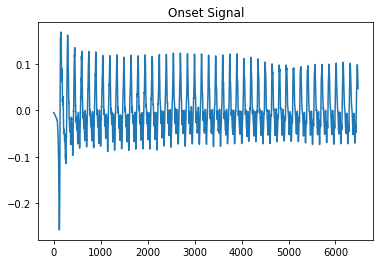

In [56]:
import numpy as np

def attack_time(signal, onset, srate):
    '''
    Computes the attack time by
    finding the time to the first frame that has a has a lower 
    magnitude than the previous frame (onset peak) since the onset. 
    
    Note: Not sure if taking the absolute value is neccesary here or not
    '''
    win_size = 128
    hop_size = 64
    offsets = np.arange(onset, len(signal), hop_size)
    
    for o in offsets[:-1]: 
        frame = signal[o:o+win_size] 
        next_frame = signal[o+hop_size:o+hop_size+win_size]
        avg_mag = np.mean(frame)
        next_avg_mag = np.mean(next_frame)
        if avg_mag > next_avg_mag:
            return (o - onset) / srate
    
fname = '../datasets/guitar/vibrato.wav'
first_onset = get_onsets(fname)[0]
signal, sr = sf.read(filename)

print(f"{fname}\n")

attack_t = attack_time(signal, first_onset, sr)

plt.title("Onset Signal")
plt.plot(signal[onsets[0]:20000])

print(f"Attack time: {attack_t}\n")

ipd.Audio(signal,rate=sr)
